# **PyTorch Computer Vision**

## **Computer vision libaries in PyTorch**💧

- 👉 `torchvision` - base domain library for PyTorch computer vision                
- 👉 `torchvision.datasets`  - This submodule contains standard datasets such as `ImageNet`, `FashionMNIST`, `CIFAR`, and `COCO` etc. , and these datasets can be used for training custom models or evaluating existing ones.
- 👉 `torchvision.models` -  Here, you’ll find pre-defined architectures like `ResNet`, `VGG`, and `DenseNet`. These models can be fine-tuned or used as feature extractors for various computer vision tasks.
- 👉 `torchvision.transforms` - This submodule provides data augmentation techniques (e.g., `cropping`, `resizing`, `color adjustments`) to enhance model robustness during training. So this is the functions for manipulating your vision data (images) to be suitable for use with an ML model
- 👉 `torch.utils.data.Dataset` - A base class for creating custom datasets. You can subclass it to load your own data and prepare it for training.
- 👉 `torch.utils.data.DataLoader` - This class helps manage `data loading`, `batching`, and `shuffling` during training. It’s essential for efficient training with large datasets.

## **1. Getting a dataset**

In [1]:
# Import torch
import torch
from torch import nn

# Import torchvision
import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

# Import matplotlib for visualization
import matplotlib.pyplot as plt

#check versions
print(torch.__version__)
print(torchvision.__version__)

2.2.1+cu121
0.17.1+cu121


In [2]:
# Getting the dataset
### Setup training data
from torchvision import datasets
train_data = datasets.FashionMNIST(
    root="data", # where to download data to?
    train=True, # do we want the training dataset?
    download=True, # do we want to download yes/no?
    transform=torchvision.transforms.ToTensor(), # how do we want to transform the data?
    target_transform=None # how do we want to transform the labels/targets?
)

### Setup test data
test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
    target_transform=None
)

100%|██████████| 26421880/26421880 [00:01<00:00, 14919191.69it/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 266257.05it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:00<00:00, 5006057.99it/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 11863888.46it/s]


Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [3]:
train_data, test_data

(Dataset FashionMNIST
     Number of datapoints: 60000
     Root location: data
     Split: Train
     StandardTransform
 Transform: ToTensor(),
 Dataset FashionMNIST
     Number of datapoints: 10000
     Root location: data
     Split: Test
     StandardTransform
 Transform: ToTensor())

In [4]:
len(train_data), len(test_data)

(60000, 10000)

In [5]:
image, label = train_data[0]

print(f"Image: {image}")
print(f"label: {label}")

Image: tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
          0.2863, 0.0000, 0.0000, 0.0039, 0.0157, 

In [6]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [7]:
class_to_idx = train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [8]:
train_data.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

In [9]:
# Check the shape of our image
print(f"Image shape: {image.shape} -> [color_channels, height, width]")
print(f"Image Squeeze: {image.squeeze().shape} -> [height, width]")
print(f"Image label: {class_names[label]}")

Image shape: torch.Size([1, 28, 28]) -> [color_channels, height, width]
Image Squeeze: torch.Size([28, 28]) -> [height, width]
Image label: Ankle boot


Image shape: torch.Size([1, 28, 28])


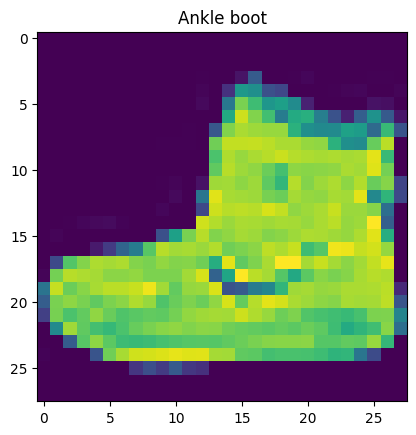

In [10]:
# Visualizing the data
import matplotlib.pyplot as plt

image, label = train_data[0]
print(f"Image shape: {image.shape}")
plt.imshow(image.squeeze())
plt.title(class_names[label])
plt.show()

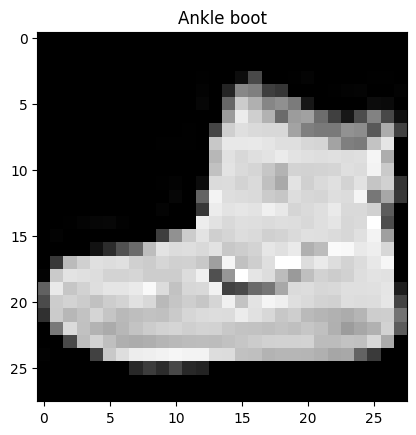

In [11]:
plt.imshow(image.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.show()

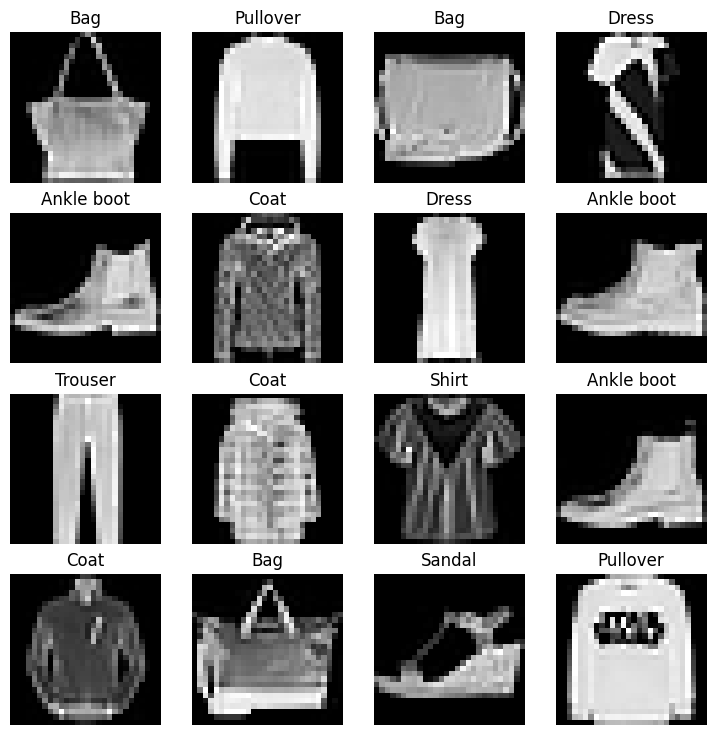

In [12]:
# plot more images
# torch.manual_seed(42)

fig = plt.figure(figsize=(9, 9))
rows, cols = 4, 4

for i in range(1, (rows*cols +1)):
    random_idx = torch.randint(0, len(train_data), size=[1]).item()
    img, label = train_data[random_idx]
    fig.add_subplot(rows, cols, i)
    plt.imshow(img.squeeze(), cmap="gray")
    plt.title(class_names[label])
    plt.axis(False)

## **2. Prepare DataLoader**

```pyton
train_data, test_data
--------------------------------
(Dataset FashionMNIST
     Number of datapoints: 60000
     Root location: data
     Split: Train
     StandardTransform
 Transform: ToTensor(),
 Dataset FashionMNIST
     Number of datapoints: 10000
     Root location: data
     Split: Test
     StandardTransform
 Transform: ToTensor())
--------------------------------
```

$\Rightarrow$ Right now, our data is in the form of **PyTorch** Datasets.



**PyTorch** Datasets hold our raw data, which is essential for training neural networks.

**DataLoader** is a powerful utility in PyTorch that converts datasets into python iterable `mini-batches`, facilitating:

- **Memory Management**: It is more computationally efficient, as in, your computing hardware may not be able to look (store in memory) at 60000 images in one hit. So we break it down to 32 images at a time (batch size of 32).


- **Gradient Optimization**: Frequent gradient updates per epoch can lead to faster convergence and improved learning.

Additional Advantages:

- **Randomization**: DataLoader shuffles the data, which is crucial for reducing model overfitting and improving generalization.

- **Parallel Processing**: It leverages multi-processing to prepare batches in the background, thus speeding up the training process.

- **Custom Batching**: You can define custom batch collation functions for complex data types or preprocessing.

In [13]:
from torch.utils.data import DataLoader

# setup the batch size hyperparameter
BATCH_SIZE = 32

# Turn the dataset into iterables (batches)
train_dataloader = DataLoader(dataset=train_data,
                              batch_size=BATCH_SIZE,
                              shuffle=True)

test_dataloader = DataLoader(dataset=test_data,
                             batch_size=BATCH_SIZE,
                             shuffle=False)

print(f"DataLoader: {train_dataloader, test_dataloader}")
print(f"Length of train_dataloader: {len(train_dataloader)} batch of {BATCH_SIZE}.")
print(f"Length of test_dataloader: {len(test_dataloader)} batch of {BATCH_SIZE}.")

# What's inside the dataloader
train_features_batch, train_label_batch = next(iter(train_dataloader))
print(f"train features batch shape: {train_features_batch.shape}")
print(f"test label batch shape: {train_label_batch.shape}")

DataLoader: (<torch.utils.data.dataloader.DataLoader object at 0x7faf61d21cc0>, <torch.utils.data.dataloader.DataLoader object at 0x7faf61d21960>)
Length of train_dataloader: 1875 batch of 32.
Length of test_dataloader: 313 batch of 32.
train features batch shape: torch.Size([32, 1, 28, 28])
test label batch shape: torch.Size([32])


image shape: torch.Size([1, 28, 28])
label shape: torch.Size([])
image label: 2


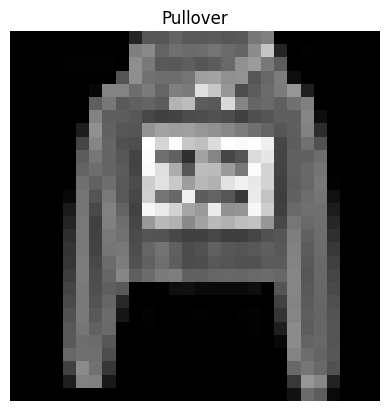

In [14]:
# visualizing the batch data
random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()
img, label = train_features_batch[random_idx], train_label_batch[random_idx]
plt.imshow(img.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis(False);

print(f"image shape: {img.shape}")
print(f"label shape: {label.shape}")
print(f"image label: {label}")

## **3. MODELS**

In [15]:
# Creating a function to time our experiments

from timeit import default_timer as timer

def print_train_time(start:float,
                     end: float,
                     device: torch.device=None):
    total_time = end - start
    print(f"Train time on {device}: {total_time:.3f} seconds")
    return total_time

start_time = timer()
# Some code ...
end_time = timer()
print_train_time(start=start_time, end=end_time, device="cpu")

Train time on cpu: 0.000 seconds


5.657799999880808e-05

>**NOTE:** When starting to build a series of machine learning modelling experiments, it's best practice to start with a **baseline model**. A baseline model is a simple model you will try and improve upon with subsequent `models/experiments`.

### `Model_0` `CPU`

In [16]:
# Create the Flatten layer
flatten_model = nn.Flatten()

# Get a single sample
x = train_features_batch[0]

# Flatten the sample
output = flatten_model(x)

# Print out what happened
print(f"Shape before flattening: {x.shape} -> [color_channels, height, width]")
print(f"Shape after flattening: {output.shape} -> [color_channels, height*width]")

Shape before flattening: torch.Size([1, 28, 28]) -> [color_channels, height, width]
Shape after flattening: torch.Size([1, 784]) -> [color_channels, height*width]


In [17]:
len(output.squeeze())

784

In [18]:

from torch import nn
class FashionMNISTModelV0(nn.Module):
    def __init__(self,
                 input_shape: int,
                 hidden_units: int,
                 output_shape: int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(),  # flatten inputs into a single vector
            nn.Linear(in_features=input_shape, out_features=hidden_units),
            nn.Linear(in_features=hidden_units, out_features=output_shape)
            )

    def forward(self, x):
        return self.layer_stack(x)

torch.manual_seed(42)

# Setup model with input parameters
model_0 = FashionMNISTModelV0(
    input_shape=28*28,            # Output from the flatten layer(input_shape~784)
    hidden_units=10,              # Number of hidden layers
    output_shape=len(class_names) # one for every class
).to("cpu")                       # keep model on CPU to begin with

model_0

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [19]:
# checking the model output using the dummy varible
dummy_x = torch.rand(1, 1, 28, 28) # batch, color_channel, height, height
model_0(dummy_x)                   # it  output 10 logits per image

tensor([[-0.0315,  0.3171,  0.0531, -0.2525,  0.5959,  0.2112,  0.3233,  0.2694,
         -0.1004,  0.0157]], grad_fn=<AddmmBackward0>)

In [20]:
model_0.state_dict()

OrderedDict([('layer_stack.1.weight',
              tensor([[ 0.0273,  0.0296, -0.0084,  ..., -0.0142,  0.0093,  0.0135],
                      [-0.0188, -0.0354,  0.0187,  ..., -0.0106, -0.0001,  0.0115],
                      [-0.0008,  0.0017,  0.0045,  ..., -0.0127, -0.0188,  0.0059],
                      ...,
                      [-0.0116,  0.0273, -0.0344,  ...,  0.0176,  0.0283, -0.0011],
                      [-0.0230,  0.0257,  0.0291,  ..., -0.0187, -0.0087,  0.0001],
                      [ 0.0176, -0.0147,  0.0053,  ..., -0.0336, -0.0221,  0.0205]])),
             ('layer_stack.1.bias',
              tensor([-0.0093,  0.0283, -0.0033,  0.0255,  0.0017,  0.0037, -0.0302, -0.0123,
                       0.0018,  0.0163])),
             ('layer_stack.2.weight',
              tensor([[ 0.0614, -0.0687,  0.0021,  0.2718,  0.2109,  0.1079, -0.2279, -0.1063,
                        0.2019,  0.2847],
                      [-0.1495,  0.1344, -0.0740,  0.2006, -0.0475, -0.2514, -0.

In [21]:
# Defining accuracy function
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = (correct / len(y_pred)) * 100
    return acc

# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.1)

In [22]:
# Creating the training/test loop on batches of data

# Import tqdm for progress bar
from tqdm.auto import tqdm

# set the seed and start the timer
torch.manual_seed(42)
timer_start = timer()

# set the number of epoch (Keeping small for faster training time)
epochs = 3

# Creating training and testing loop
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n----------")
    ### -------------------Training-------------------
    train_loss, train_acc = 0, 0
    model_0.train()
    # Add a loop to loop through the training batches
    for batch, (X, y) in enumerate(train_dataloader):
        # Put data on target device
        X, y = X.to("cpu"), y.to("cpu")

        # 1. Forward Pass
        y_pred = model_0(X)

        # 2. Calculate the loss and accuracy
        loss = loss_fn(y_pred, y)
        train_loss += loss                                                     # accumulate train loss
        train_acc += accuracy_fn(y_true=y, y_pred=torch.argmax(y_pred, dim=1)) # accumulate accuracy
                                                                               # go from logits -> prediction labels
        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # 5. Optimizer step
        optimizer.step() # Update the model parameter once per batch

        # Training progress(print out what's happening)
        if batch % 400 ==0:
            print(f"Looked at {batch*len(X)}/{len(train_dataloader.dataset)} samples.")

    # Scale loss and acc to find the average loss/acc per batch
    train_loss /= len(train_dataloader)
    train_acc /= len(train_dataloader)

    ### -------------------Testing-------------------
    test_loss, test_acc = 0, 0
    model_0.eval()
    with torch.inference_mode():
        for X_test, y_test in test_dataloader:
            # Send the data to the target device
            X_test, y_test = X_test.to("cpu"), y_test.to("cpu")

            # 1. Forward pass
            test_pred = model_0(X_test)

            # 2. Calculate loss & accuracy (accumulatively)
            test_loss += loss_fn(test_pred, y_test)
            test_acc += accuracy_fn(y_true=y_test, y_pred=torch.argmax(test_pred, dim=1))

        # Calculate the test loss & test accuracy average per batch
        test_loss /= len(test_dataloader)
        test_acc /= len(test_dataloader)


    # Training progress(print out what's happening)
    print(f"\nTrain loss: {train_loss:.4f} | Train acc: {train_acc:.4f}  | Test loss: {test_loss:.4f} | Test acc: {test_acc:.4f}")

# Calculate training time
timer_end = timer()
total_train_time_model_0 = print_train_time(start=timer_start,
                                            end=timer_end,
                                            device=str(next(model_0.parameters()).device))


  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
----------
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.

Train loss: 0.5904 | Train acc: 79.1717  | Test loss: 0.5095 | Test acc: 82.0387
Epoch: 1
----------
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.

Train loss: 0.4763 | Train acc: 83.3200  | Test loss: 0.4799 | Test acc: 83.1969
Epoch: 2
----------
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.

Train loss: 0.4550 | Train acc: 84.0517  | Test loss: 0.4766 | Test acc: 83.4265
Train time on cpu: 39.743 seconds


In [23]:
# Make Predictions and get model_0 result

torch.manual_seed(42)

def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn):
    """Returns a dictionary containing the results of model predicting on data_loader."""
    loss, acc = 0, 0
    model.eval()
    with torch.inference_mode():
        for X, y in tqdm(data_loader):
            # Make predictions
            y_pred = model(X)

            # Accumulate the loss and acc values per batch
            loss += loss_fn(y_pred, y)
            acc += accuracy_fn(y_true=y,
                               y_pred=y_pred.argmax(dim=1))

        # Scale loss and acc to find the average loss/acc per batch
        loss /= len(data_loader)
        acc /= len(data_loader)

    return {"model_name": model.__class__.__name__,
            "model_loss": loss.item(),
            "model_acc": acc}

# Calculate model 0 results on test dataset
model_0_results = eval_model(model=model_0,
                             data_loader=test_dataloader,
                             loss_fn=loss_fn,
                             accuracy_fn=accuracy_fn)
model_0_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.47663894295692444,
 'model_acc': 83.42651757188499}

### `Model_1` `GPU`

In [ ]:
# Import torch
import torch
from torch import nn
from torch.utils.data import DataLoader

# Import torchvision
import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

# Import matplotlib for visualization
import matplotlib.pyplot as plt

# Calculate the loop execution time
from timeit import default_timer as timer

# Import tqdm for progress bar
from tqdm.auto import tqdm

#check versions
print(torch.__version__)
print(torchvision.__version__)

# Seed
torch.manual_seed(42)

### ------------------------------Datasets--------------------------------------
#  `from torchvision import datasets`

### Setup training data
train_data = datasets.FashionMNIST(
    root="data", # where to download data to?
    train=True, # do we want the training dataset?
    download=True, # do we want to download yes/no?
    transform=torchvision.transforms.ToTensor(), # how do we want to transform the data?
    target_transform=None # how do we want to transform the labels/targets?
)

### Setup test data
test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
    target_transform=None
)

# checking the number of classes
class_names = train_data.classes
print(f"Number of classes: {class_names}")

### ------------------------------DataLoader------------------------------------
# `from torch.utils.data import DataLoader`

# setup the batch size hyperparameter
BATCH_SIZE = 32

# Turn the dataset into iterables (batches)
train_dataloader = DataLoader(dataset=train_data,
                              batch_size=BATCH_SIZE,
                              shuffle=True)

test_dataloader = DataLoader(dataset=test_data,
                             batch_size=BATCH_SIZE,
                             shuffle=False)


# Setup device-agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Available device: {device}")

### -----------------------------------MODEL-----------------------------------
# Create a model with non-linear and linear layers
class FashionMNISTModelV1(nn.Module):
    def __init__(self,
                 input_shape: int,
                 hidden_units: int,
                 output_shape: int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=input_shape, out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=output_shape),
            nn.ReLU()
        )

    def forward(self, x):
        return self.layer_stack(x)

# create an instance of model_1
model_1 = FashionMNISTModelV1(input_shape=28*28,
                              hidden_units=10,
                              output_shape=len(class_names)).to(device)

print(model_1)

### --------------------`loss`, `optimizer` `accuracy`--------------------------
loss_fn = nn.CrossEntropyLoss()  # Measuring how wrong the model is
optimizer = torch.optim.SGD(params=model_1.parameters(), lr=0.1)

def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = (correct / len(y_pred)) * 100
    return acc


# Functionizing training and evaluation/testing loops
### ------------------------------Training loop---------------------------------
def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device = device):

    train_loss, train_acc = 0, 0

    # Put the model into training mode
    model.train()

    # looping through the training batches
    for batchs, (X, y) in enumerate(data_loader):
        # Put the data on the target device
        X, y = X.to(device), y.to(device)

        # 1. Forward pass(output the raw logits from the model)
        y_pred = model(X)

        # 2. Calculate the loss and accuracy(per batch)
        loss = loss_fn(y_pred, y)
        train_loss += loss  # accumulate train loss
        train_acc += accuracy_fn(y_true=y, y_pred=torch.argmax(y_pred, dim=1))

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # 5. Optimizer step
        optimizer.step()

    # Divide total train loss and acc by length of train dataloader
    train_loss /= len(data_loader)
    train_acc /= len(data_loader)
    print(f"Train loss: {train_loss:.5f} | Train acc: {train_acc:.2f}%")


### ----------------------------Testing loop------------------------------------
def test_step(model: torch.nn.Module,
              data_loader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              accuracy_fn,
              device: torch.device = device):

    test_loss, test_acc = 0, 0

    # Put the model in  eval mode
    model.eval()

    # Turn on the inference mode context manager
    with torch.inference_mode():
        for X, y in data_loader:
            # Send the data to the target device
            X, y = X.to(device), y.to(device)

            # 1. Forward pass(Output the raw logits)
            test_pred = model(X)

            # 2. Calculate the loss/acc
            test_loss += loss_fn(test_pred, y)
            test_acc += accuracy_fn(y_true=y, y_pred=torch.argmax(test_pred, dim=1)) # go from logits -> prediction labels

        ## Adjust metrics and print out
        test_loss /= len(data_loader)
        test_acc /= len(data_loader)
        print(f"Test loss: {test_loss:.5f} | Test acc: {test_acc:.2f}%\n")


### ---------------------------Evaluation loop----------------------------------

def print_train_time(start:float,
                     end: float,
                     device: torch.device=None):
    total_time = end - start
    print(f"Train time on {device}: {total_time:.3f} seconds")
    return total_time

# Set epoch
epochs = 3

start_timer = timer() # <<<-start timer->>>

# Create the optimiztion and evaluation loop using train_step() and test_step()
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n--------")

    train_step(model=model_1,
               data_loader=train_dataloader,
               loss_fn=loss_fn,
               optimizer=optimizer,
               accuracy_fn=accuracy_fn,
               device=device)

    test_step(model=model_1,
              data_loader=test_dataloader,
              loss_fn=loss_fn,
              accuracy_fn=accuracy_fn,
              device=device)

end_timer = timer() # <<<-End Timer->>>
total_train_time_model_1 = print_train_time(start=start_timer,
                                            end=end_timer,
                                            device=device)

2.2.1+cu121
0.17.1+cu121
Number of classes: ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
Available device: cuda
FashionMNISTModelV1(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): ReLU()
    (3): Linear(in_features=10, out_features=10, bias=True)
    (4): ReLU()
  )
)


  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
--------


**CPU**
```
Train time on cpu: 39.348 seconds
```

**GPU**
```
Train time on cuda: 31.730 seconds
```